In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
conn = sqlite3.connect('factbook.db')
cursor = conn.cursor()

In [3]:
q1 = "SELECT * FROM sqlite_master WHERE type='table'"

In [4]:
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [5]:
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [6]:
q3 = "SELECT MIN(population) FROM facts"
pd.read_sql_query(q3, conn)

,MIN(population)
0,0


In [7]:
q4 = "SELECT MAX(population) FROM facts"
pd.read_sql_query(q4, conn)

,MAX(population)
0,7256490011


In [8]:
q5 = "SELECT MIN(population_growth) FROM facts"
pd.read_sql_query(q5, conn)

,MIN(population_growth)
0,0.0


In [9]:
q6 = "SELECT MAX(population_growth) FROM facts"
pd.read_sql_query(q6, conn)

,MAX(population_growth)
0,4.02


In [10]:
q7 = "SELECT name FROM facts WHERE population = (SELECT MIN(population) FROM facts)"
pd.read_sql_query(q7, conn)

,name
0,Antarctica


In [11]:
q8 = "SELECT name FROM facts WHERE population = (SELECT MAX(population) FROM facts)"
pd.read_sql_query(q8, conn)

,name
0,World


In [12]:
q9= '''
SELECT * FROM facts
WHERE population != (SELECT MIN(population) FROM facts)
AND population != (SELECT MAX(population) FROM facts)'''
pd.read_sql_query(q9, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748.0,27398.0,1350.0,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468.0,468.0,0.0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436,1.24,15.85,5.69,2.21,2015-11-01 13:20:13.049627,2015-11-01 13:20:13.049627
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,43431886,0.93,16.64,7.33,0.00,2015-11-01 13:20:18.233063,2015-11-01 13:20:18.233063
7,8,am,Armenia,29743.0,28203.0,1540.0,3056382,0.15,13.61,9.34,5.80,2015-11-01 13:20:23.048753,2015-11-01 13:20:23.048753
8,9,as,Australia,7741220.0,7682300.0,58920.0,22751014,1.07,12.15,7.14,5.65,2015-11-01 13:20:28.186341,2015-11-01 13:20:28.186341
9,10,au,Austria,83871.0,82445.0,1426.0,8665550,0.55,9.41,9.42,5.56,2015-11-01 13:20:33.093597,2015-11-01 13:20:33.093597


In [20]:
q10 = '''SELECT population, population_growth, birth_rate, death_rate FROM facts
WHERE population != (SELECT MIN(population) FROM facts)
AND population != (SELECT MAX(population) FROM facts)'''

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


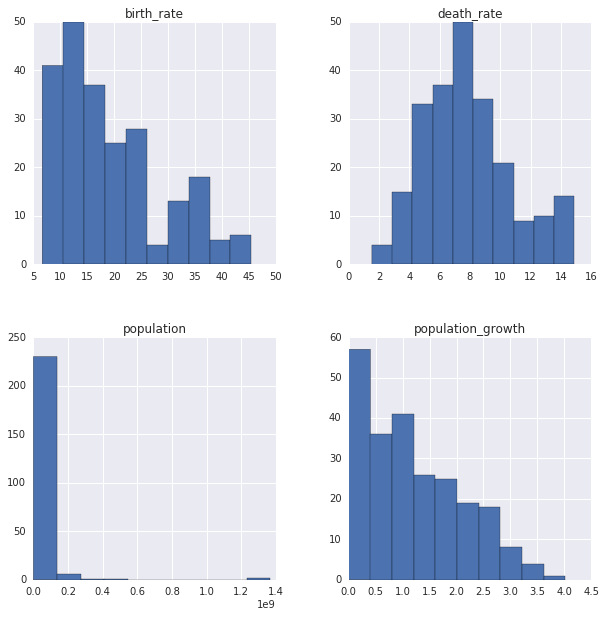

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

pd.read_sql_query(q10, conn).hist(ax=ax)
plt.show()

In [24]:
q11 = '''
SELECT name,CAST(population as float)/CAST(area_land as float) AS population_density
FROM facts
ORDER BY population_density DESC'''

pd.read_sql_query(q11, conn)

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


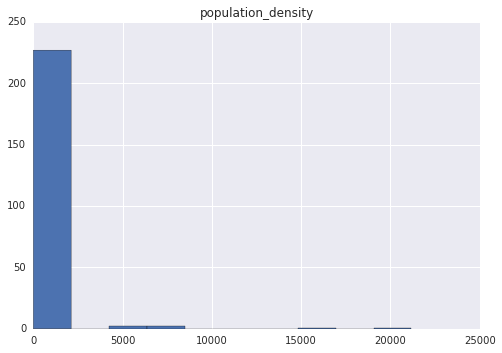

In [29]:
pd.read_sql_query(q11, conn).hist()
plt.show()

In [32]:
q12 = '''
SELECT name, CAST(area_water as float)/CAST(area_land as float) AS water_land_ratio
FROM facts
ORDER BY water_land_ratio DESC
'''

pd.read_sql_query(q12, conn)

,name,water_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240
